<p style="font-family: Arial; font-size:1.8em;color:green;"> 
1. Run the clustering algorithms on the datasets and describe what you see.
</p>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis

In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [3]:
X.shape

(569, 30)

a discussion of your datasets, and why they're interesting: If you're using the same datasets as before at least briefly remind us of what they are so we don't have to revisit your old assignment write-up... and if you aren't well that's a whole lot of work you're going to have to recreate from assignment 1 isn't it?

explanations of your methods: for example, how did you choose k?

a description of the kind of clusters that you got.

analyses of your results. Why did you get the clusters you did? Do they make "sense"? If you used data that already had labels (for example data from a classification problem from assignment #1) did the clusters line up with the labels? Do they otherwise line up naturally? Why or why not? Compare and contrast the different algorithms. What sort of changes might you make to each of those algorithms to improve performance? How much performance was due to the problems you chose? Be creative and think of as many questions you can, and as many answers as you can. Take care to justify your analysis with data explicitly.

### Preprocess data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
categories = list(X_train.columns)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<p style="font-family: Arial; font-size:1.4em;color:blue;"> 
K-means clustering
</p>    

In [5]:
%%time
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

CPU times: user 1.51 s, sys: 526 ms, total: 2.03 s
Wall time: 645 ms


In [6]:
y_pred = kmeans.labels_

In [7]:
accuracy_score(y_train, y_pred)

0.903755868544601

<p style="font-family: Arial; font-size:1em;color:magenta;"> 
Ground truth plot on various features
</p>

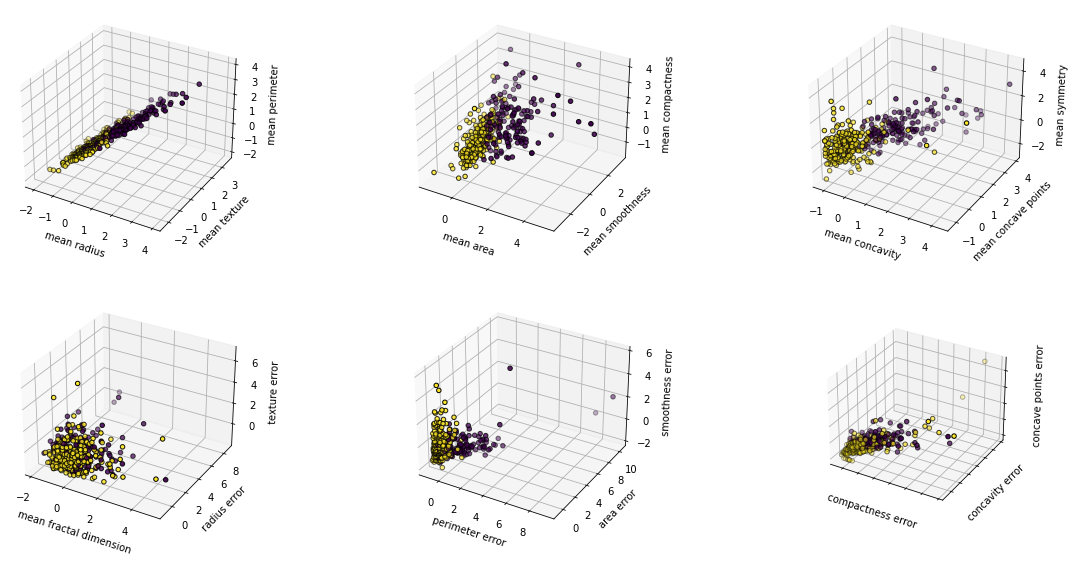

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 15))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# ax = Axes3D(fig)

combs = [(0, 1, 2), (3, 4, 5), (6, 7, 8), (9, 10, 11), (12, 13, 14), (15, 16, 17)]

for index, (x, y, z) in enumerate(combs):
    ax = fig.add_subplot(3,3,index+1, projection='3d')
    ax.scatter(X_train[:, x], X_train[:, y], X_train[:, z], c=y_train, edgecolor='k')
    ax.set_xlabel(categories[x])
    ax.set_ylabel(categories[y])
    ax.set_zlabel(categories[z])

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# ax.set_title('Ground Truth')
ax.dist = 12
plt.show()

<p style="font-family: Arial; font-size:1em;color:magenta;"> 
Clustering - How features affect the clustering
</p>

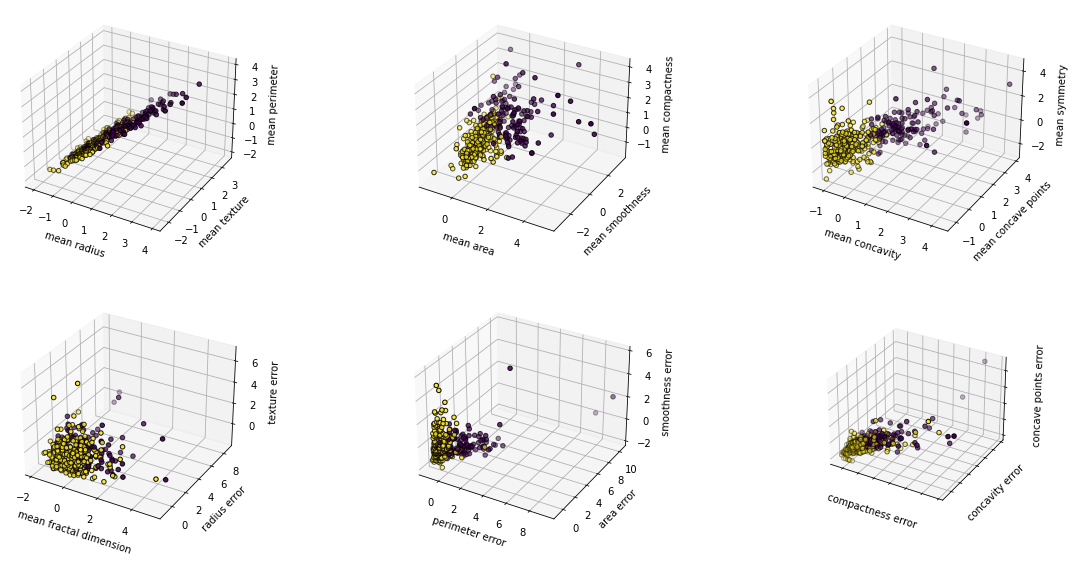

In [9]:
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# ax = Axes3D(fig)
fig = plt.figure(figsize=(20, 15))

combs = [(0, 1, 2), (3, 4, 5), (6, 7, 8), (9, 10, 11), (12, 13, 14), (15, 16, 17)]

for index, (x, y, z) in enumerate(combs):
    ax = fig.add_subplot(3,3,index+1, projection='3d')
    ax.scatter(X_train[:, x], X_train[:, y], X_train[:, z], c=y_pred, edgecolor='k')
    ax.set_xlabel(categories[x])
    ax.set_ylabel(categories[y])
    ax.set_zlabel(categories[z])

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# ax.set_title('Ground Truth')
ax.dist = 12
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Expectation Maximization
</p>

No handles with labels found to put in legend.


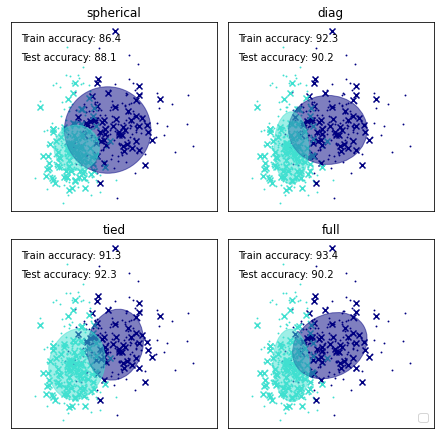

In [10]:
# Ref: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

from sklearn.mixture import GaussianMixture
import matplotlib as mpl

colors = ['navy', 'turquoise']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')


#         for train_index, test_index in skf.split(X_train, y_train):
#         kmeans = None
#         X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]

# Only take the first fold.
# train_index, test_index = next(iter(skf.split(X_train, y_train)))
# X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
# y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X_train[y_train == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color)
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

<p style="font-family: Arial; font-size:1.8em;color:green;">
---------- End of Q1. -------------
</p>

<p style="font-family: Arial; font-size:1.8em;color:green;">
2. Apply the dimensionality reduction algorithms to the two datasets and describe what you see.
</p>

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

<p style="font-family: Arial; font-size:1.4em;color:blue;">
PCA - Principal Component Analysis
</p>

Ref:
https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#:~:text=The%20eigenvectors%20and%20eigenvalues%20of,the%20eigenvalues%20determine%20their%20magnitude.

In [11]:
from sklearn.decomposition import PCA

In [12]:
print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


Data has 30 features representing 30 dimentions. Looking at the data variance we can check how many components it should be resolved into so that we maintain good variance on data

Text(0.5, 1.0, 'Explained Variance')

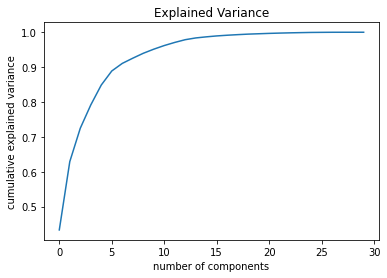

In [13]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title("Explained Variance")

<p style="font-family: Arial; font-size:1em;color:magenta;">
PCA Eigen value distribution
</p>


Eigenvalues 
[13.0251132   5.88977769  2.87793898  1.20937017  2.00948748  1.71733052]
6


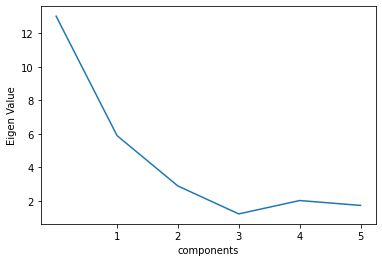

In [14]:
pca = PCA(6)  # project from 30 to 6 dimensions
X_train_transform = pca.fit_transform(X_train)
cov_mat = np.cov(X_train_transform.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#Sort descending
# eig_vals[::-1].sort() 

#Plot
x_ticks = list(range(1, 14))
plt.xticks(x_ticks)
plt.plot(eig_vals)
plt.xlabel('components')
plt.ylabel('Eigen Value');

print('\nEigenvalues \n%s' %eig_vals)
print(len(eig_vals))


Surprisingly we see that 90% of the variance can be retained just by using 6 principal components.

In [15]:
pca = PCA(6)  # project from 30 to 6 dimensions
X_train_transform = pca.fit_transform(X_train)
print(X_train.shape)
print(X_train_transform.shape)

(426, 30)
(426, 6)


Text(0.5, 1.0, 'First two components')

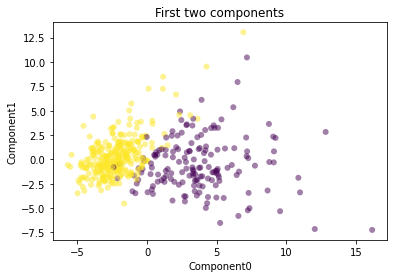

In [16]:
comp_0 = 0
comp_1 = 1
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('First two components')

Text(0.5, 1.0, 'Last two components')

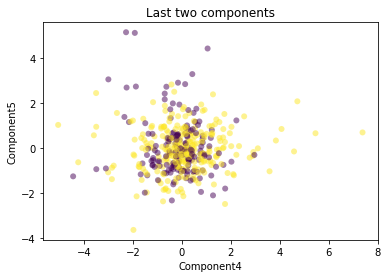

In [17]:
comp_0 = 4
comp_1 = 5
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('Last two components')

It is clear that first two major components are much more helpful in segregating the data than last two components.

<p style="font-family: Arial; font-size:1em;color:magenta;">
PCA data reconstruction
</p>

(426, 30)
(426, 6)
(426, 30)


Text(0.5, 1.0, 'X_train')

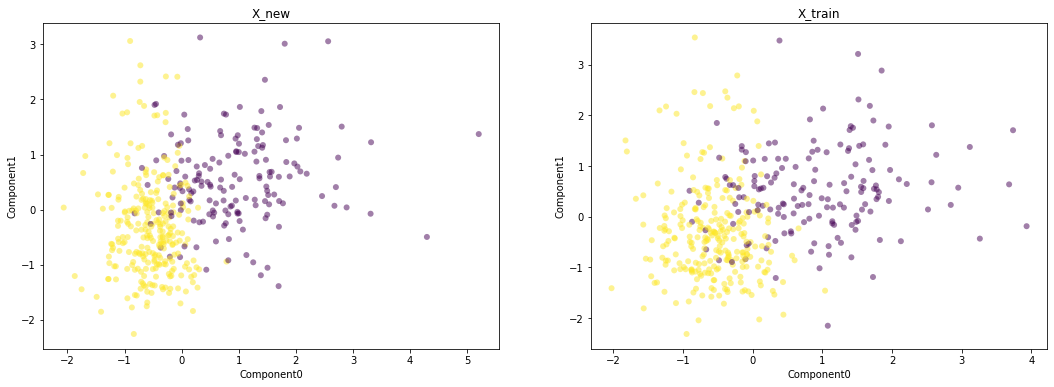

In [18]:
pca = PCA(6)  # project from 30 to 6 dimensions
X_train_transform = pca.fit_transform(X_train)
print(X_train.shape)
print(X_train_transform.shape)

X_new = pca.inverse_transform(X_train_transform)
print(X_new.shape)
comp_0 = 0
comp_1 = 1
plt.figure(figsize=(18 ,6))
plt.subplot(121)
plt.scatter(X_new[:, comp_0], X_new[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_new')

plt.subplot(122)
plt.scatter(X_train[:, comp_0], X_train[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_train')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Random Projection
</p>

In [19]:
from sklearn import random_projection

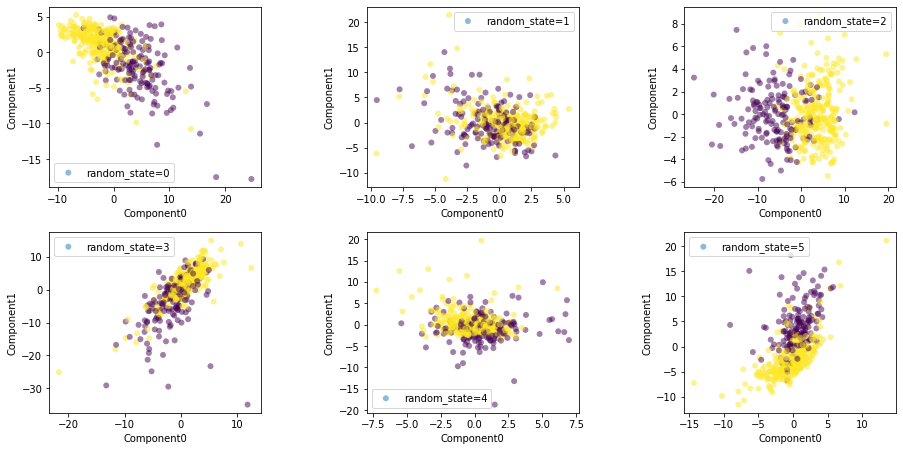

In [20]:
comp_0 = 0
comp_1 = 1

rLow = 0
rHigh = 6
rStep = 1
plt.figure(figsize=(4 * rHigh // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.25, wspace=.5,
                    left=.01, right=.99)

for r in range(rLow, rHigh, rStep):
    X_train_transform = None
    h = plt.subplot(2, rHigh // 2, r + 1)

    rp = random_projection.GaussianRandomProjection(n_components = 2, random_state=r)
    X_train_transform = rp.fit_transform(X_train)

    plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], 
                    c=y_train, edgecolor='none', alpha=0.5, label="random_state="+str(r))
    plt.xlabel('Component'+str(comp_0))
    plt.ylabel('Component'+str(comp_1))
    plt.legend(loc='best')
    

As expeced, projecting on a random plane has varying performance as we can see r=0 data has clean boundary where as r=3 data partitions are mangled.

It may be observed that with r=0 data boundary is much cleaner that what we observed plotting the least significant PCA components.

<p style="font-family: Arial; font-size:1em;color:magenta;">
Time comparison
</p>

In [21]:
%%time
pca = PCA(6)  # project from 30 to 6 dimensions
X_train_transform = pca.fit_transform(X_train)

CPU times: user 4.65 ms, sys: 1.52 ms, total: 6.17 ms
Wall time: 4.31 ms


In [22]:
%%time
rp = random_projection.GaussianRandomProjection(n_components = 6, random_state=0)
X_train_transform = rp.fit_transform(X_train)

CPU times: user 1.88 ms, sys: 212 µs, total: 2.1 ms
Wall time: 1.91 ms


In [23]:
%%time
ica = FastICA(n_components=6, random_state=0)
X_train_transform = ica.fit_transform(X_train)

CPU times: user 20.7 ms, sys: 4.66 ms, total: 25.3 ms
Wall time: 17.4 ms


In [24]:
%%time
fa = FactorAnalysis(n_components=6, random_state=0)
X_transform = fa.fit_transform(X_train)

CPU times: user 1.37 s, sys: 658 ms, total: 2.03 s
Wall time: 814 ms


<p style="font-family: Arial; font-size:1.4em;color:blue;">
ICA - Independent Component Analysis
</p>

In [25]:
X_train_transform =  None
ica = FastICA(n_components=2, random_state=0)

X_train_transform = ica.fit_transform(X_train)
print(X_train.shape, X_train_transform.shape)

(426, 30) (426, 2)


Text(0.5, 1.0, 'X_train_transform')

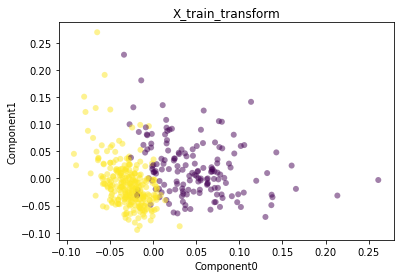

In [26]:
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_train_transform')

Text(0.5, 1.0, 'X_train')

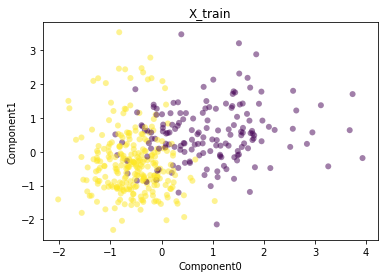

In [27]:
plt.scatter(X_train[:, comp_0], X_train[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_train')

<p style="font-family: Arial; font-size:1em;color:magenta;">
ICA data reconstruction
</p>

In [28]:
X_train_transform =  None
X_new = None
ica = FastICA(n_components=7, random_state=0)
X_train_transform = ica.fit_transform(X_train)

X_new = ica.inverse_transform(X_train_transform)
print("Train ", X_train.shape, "Transformed", X_train_transform.shape, "Reconstructed", X_new.shape)


Train  (426, 30) Transformed (426, 7) Reconstructed (426, 30)


Text(0.5, 1.0, 'X_train')

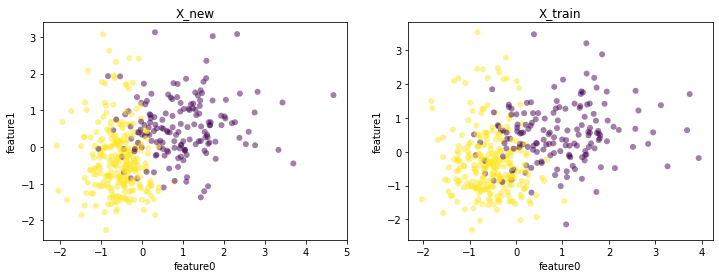

In [29]:
comp_0 = 0
comp_1 = 1
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_new[:, comp_0], X_new[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('feature'+str(comp_0))
plt.ylabel('feature'+str(comp_1))
plt.title('X_new')

plt.subplot(122)
plt.scatter(X_train[:, comp_0], X_train[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('feature'+str(comp_0))
plt.ylabel('feature'+str(comp_1))
plt.title('X_train')

In [30]:
# https://github.com/akcarsten/Independent_Component_Analysis
# Calculate Kurtosis

def kurt(x):
    n = np.shape(x)[0]
    mean = np.sum((x**1)/n) # Calculate the mean
    var = np.sum((x-mean)**2)/n # Calculate the variance
    skew = np.sum((x-mean)**3)/n # Calculate the skewness
    kurt = np.sum((x-mean)**4)/n # Calculate the kurtosis
    kurt = kurt/(var**2)-3

    return kurt, skew, var, mean

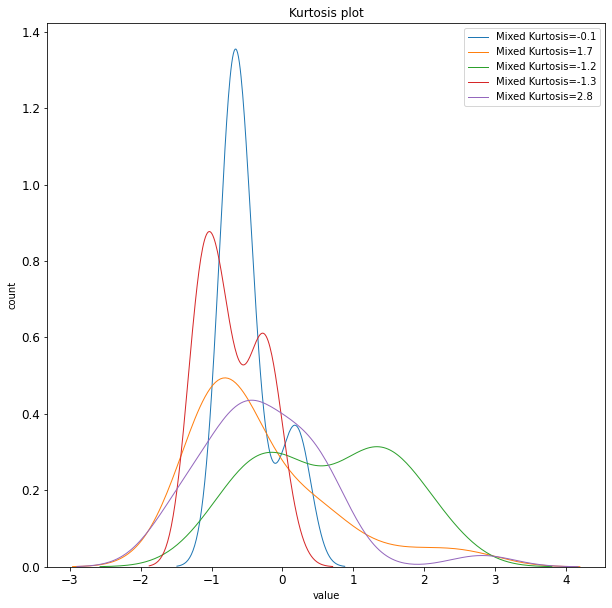

In [31]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i in range(5):
    sns.kdeplot(X_train[i, :], lw=1, label='Mixed Kurtosis={}'.format(np.round(kurt(X_train[i, :])[0], decimals=1)))

ax.tick_params(labelsize=12)
ax.set_xlabel('value')
ax.set_ylabel('count')
ax.set_title('Kurtosis plot')
plt.legend()
plt.show()

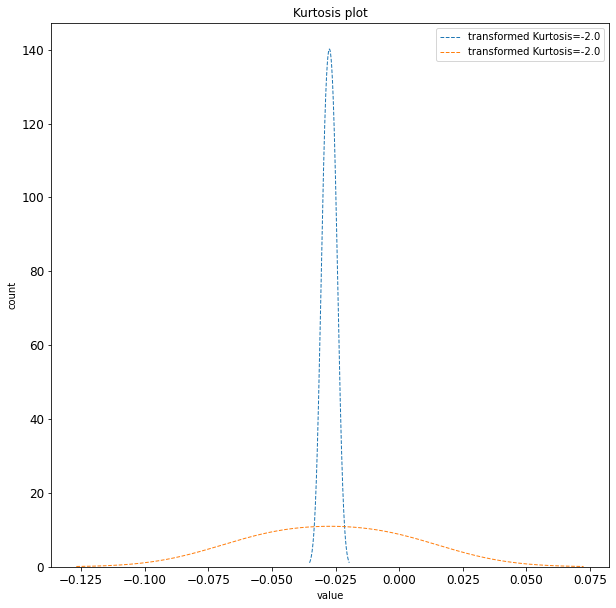

In [32]:
import seaborn as sns

X_train_transform =  None
X_new = None
ica = FastICA(n_components=2, random_state=0)
X_train_transform = ica.fit_transform(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i in range(2):   
    sns.kdeplot(X_train_transform[i, :], lw=1, ls='--', label='transformed Kurtosis={}'.format(np.around(kurt(X_train_transform[i, :])[0], decimals=1)))

ax.tick_params(labelsize=12)
ax.set_xlabel('value')
ax.set_ylabel('count')
ax.set_title('Kurtosis plot')
plt.legend()
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Factor Analysis dimentionality reduction
</p>

In [33]:
fa = FactorAnalysis(n_components=2, random_state=0)
X_transform = fa.fit_transform(X_train)
print(X_train.shape)
print(X_transform.shape)

(426, 30)
(426, 2)


Text(0.5, 1.0, 'X_train')

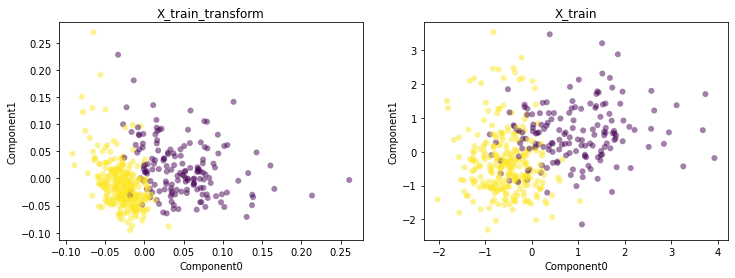

In [34]:
comp_0 = 0
comp_1 = 1
plt.figure(figsize=(12 ,4))
plt.subplot(121)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_train_transform')


plt.subplot(122)
plt.scatter(X_train[:, comp_0], X_train[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_train')

<p style="font-family: Arial; font-size:1.8em;color:green;">
------------- End of Q2. -------------
</p>

<p style="font-family: Arial; font-size:1.8em;color:green;">
3. Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report.
</p>

In [35]:
n_features = 6

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply KMeans on PCA reduced data
</p>

In [36]:
X_train_transform = None
pca = PCA(n_features)  # project from 30 to 6 dimensions
X_train_transform = pca.fit_transform(X_train)
print(X_train.shape)
print(X_train_transform.shape)

(426, 30)
(426, 6)


0.903755868544601


Text(0.5, 1.0, 'KMeans Cluster Components')

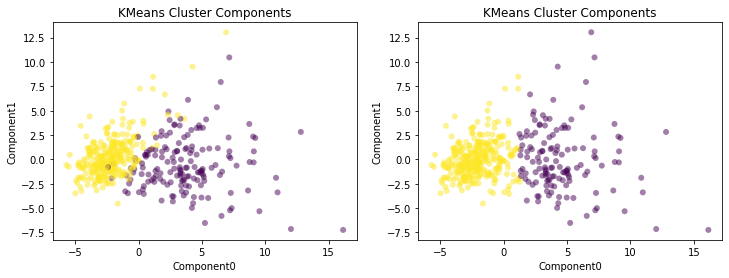

In [37]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_transform)
y_pred = kmeans.predict(X_train_transform)
y_pred = 1 - y_pred
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply EM on PCA reduced data
</p>

0.8568075117370892


Text(0.5, 1.0, 'EM Cluster Components')

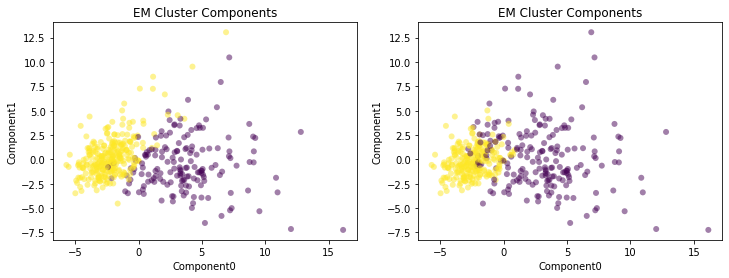

In [38]:
y_pred = None
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train_transform)
y_pred = gmm.predict(X_train_transform)
y_pred = 1 - y_pred
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply Kmeans on ICA reduced data
</p>

In [39]:
X_train_transform =  None
ica = FastICA(n_components=n_features, random_state=0)

X_train_transform = ica.fit_transform(X_train)
print(X_train.shape, X_train_transform.shape)

(426, 30) (426, 6)


0.9413145539906104


Text(0.5, 1.0, 'KMeans Cluster Components')

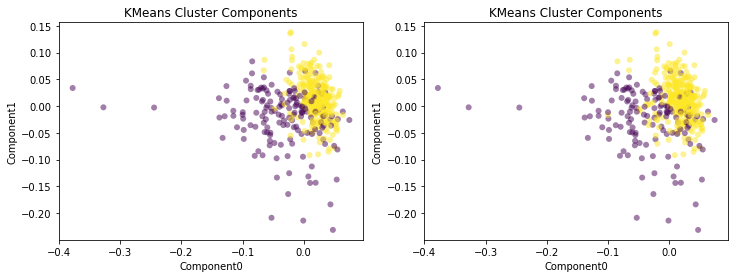

In [40]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_transform)
y_pred = kmeans.predict(X_train_transform)
y_pred = 1 - y_pred
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply EM on ICA reduced data
</p>

0.8568075117370892


Text(0.5, 1.0, 'EM Cluster Components')

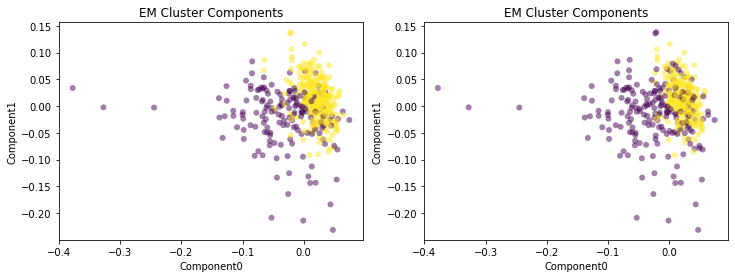

In [41]:
y_pred = None
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train_transform)
y_pred = gmm.predict(X_train_transform)
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply Kmeans on RP reduced data
</p>

In [42]:
X_train_transform = None
rp = random_projection.GaussianRandomProjection(n_components = n_features, random_state=0)
X_train_transform = rp.fit_transform(X_train)
print(X_train.shape, X_train_transform.shape)

(426, 30) (426, 6)


0.892018779342723


Text(0.5, 1.0, 'KMeans Cluster Components')

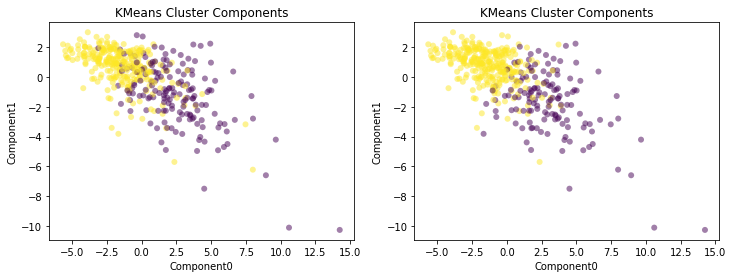

In [43]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_transform)
y_pred = kmeans.predict(X_train_transform)
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply EM on RP reduced data
</p>

0.8474178403755869


Text(0.5, 1.0, 'EM Cluster Components')

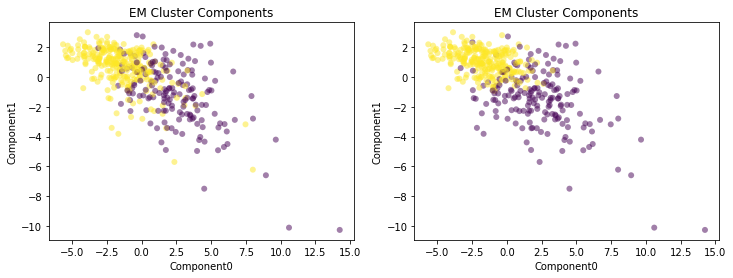

In [44]:
y_pred = None
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train_transform)
y_pred = gmm.predict(X_train_transform)
y_pred = 1- y_pred
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply Kmeans on Factor Analysis reduced data
</p>

In [45]:
X_transform = None
fa = FactorAnalysis(n_components=n_features, random_state=0)
X_transform = fa.fit_transform(X_train)
print(X_train.shape)
print(X_transform.shape)

(426, 30)
(426, 6)


0.892018779342723


Text(0.5, 1.0, 'KMeans Cluster Components')

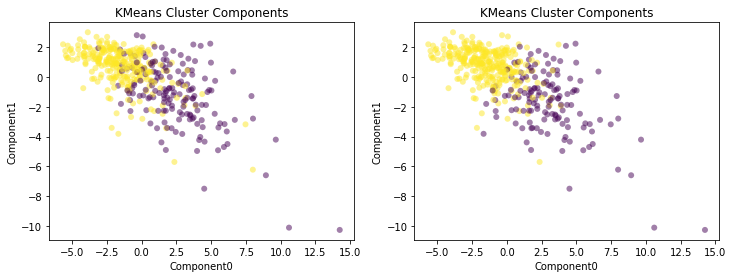

In [46]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_transform)
y_pred = kmeans.predict(X_train_transform)
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply EM on Factor Analysis reduced data
</p>

0.8474178403755869


Text(0.5, 1.0, 'EM Cluster Components')

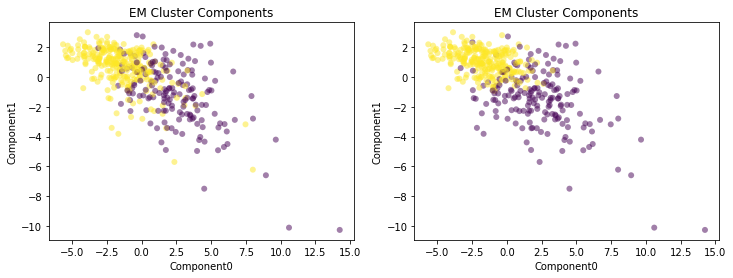

In [47]:
y_pred = None
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train_transform)
y_pred = gmm.predict(X_train_transform)
y_pred = 1- y_pred
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

<p style="font-family: Arial; font-size:1.8em;color:green;">
---------- End of Q3. -------------
</p>

<p style="font-family: Arial; font-size:1.8em;color:green;"> 
4. Apply the dimensionality reduction algorithms to one of your datasets from assignment #1 (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) and rerun your neural network learner on the newly projected data.
</p>

<p style="font-family: Arial; font-size:1.4em;color:blue;"> 
Apply PCA output to NN for breast cancer classifier
</p>

<p style="font-family: Arial; font-size:1em;color:blue;"> 
Assignment 1 NN
</p>

In [48]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras import backend as K

In [49]:
# model architecture
classifier = Sequential() 
classifier.add(Dense(units = 24, activation = 'relu', input_dim = X_train.shape[1], kernel_initializer='random_uniform'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 12, activation = 'relu', kernel_initializer='random_uniform'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer='random_uniform'))
classifier.compile(optimizer = RMSprop(), loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                744       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [50]:
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X_train, y_train, random_state=0)

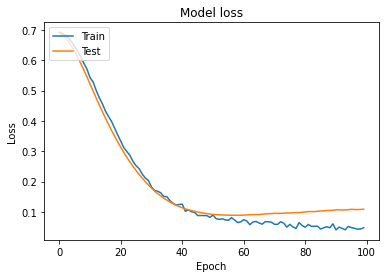

CPU times: user 6.01 s, sys: 329 ms, total: 6.34 s
Wall time: 6.16 s


In [51]:
%%time
history = classifier.fit(X_train_cross, y_train_cross, validation_data = 
                         (X_test_cross,y_test_cross), epochs=100, batch_size=100, shuffle=False, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [52]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = classifier.fit(X_train_cross, y_train_cross, validation_data = 
                         (X_test_cross,y_test_cross), epochs=300, callbacks=[callback], shuffle=False, verbose=0)
scores = classifier.evaluate(X_train_cross, y_train_cross, verbose=0)
print("Train %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

scores = classifier.evaluate(X_test_cross, y_test_cross, verbose=0)
print("Validation %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

scores = classifier.evaluate(X_test, y_test, verbose=0)
print("Test %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Train accuracy: 99.06%
Validation accuracy: 98.13%
Test accuracy: 94.41%


<p style="font-family: Arial; font-size:1em;color:blue;"> 
PCA reduced dimension NN
</p>

In [53]:
# For apples to apples comparison all dimentionality reducing algo should use n_features = 6
n_features = 6

In [54]:
X_train_transform = None
pca = PCA(n_features)  # project from 30 to 6 dimensions
X_train_transform = pca.fit_transform(X_train)
print(X_train.shape)
print(X_train_transform.shape)

(426, 30)
(426, 6)


In [55]:
X_train_trans_cross, X_test_trans_cross, y_train_cross, y_test_cross = \
                    train_test_split(X_train_transform, y_train, random_state=0)

In [56]:
# model architecture
classifier = Sequential() 
classifier.add(Dense(units = 24, activation = 'relu', input_dim = X_train_transform.shape[1], kernel_initializer='random_uniform'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 12, activation = 'relu', kernel_initializer='random_uniform'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer='random_uniform'))
classifier.compile(optimizer = RMSprop(), loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                168       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                300       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


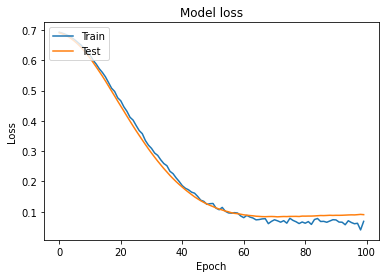

CPU times: user 6.41 s, sys: 360 ms, total: 6.77 s
Wall time: 6.66 s


In [57]:
%%time
history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=100, batch_size=100, shuffle=False, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

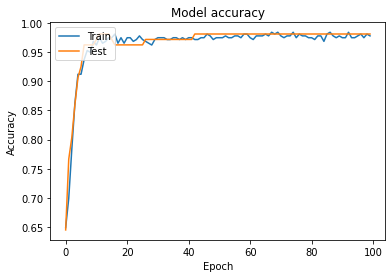

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [59]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=300, callbacks=[callback], shuffle=False, verbose=0)
scores = classifier.evaluate(X_train_trans_cross, y_train_cross, verbose=0)
print("Train %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

scores = classifier.evaluate(X_test_trans_cross, y_test_cross, verbose=0)
print("Validation %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

X_test_transform = None
X_test_transform = pca.fit_transform(X_test)

scores = classifier.evaluate(X_test_transform, y_test, verbose=0)
print("Test %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Train accuracy: 98.12%
Validation accuracy: 98.13%
Test accuracy: 95.10%


<p style="font-family: Arial; font-size:1em;color:blue;"> 
Apply Random Projection reduced dimension NN
</p>

CPU times: user 18.5 s, sys: 1.18 s, total: 19.6 s
Wall time: 18 s


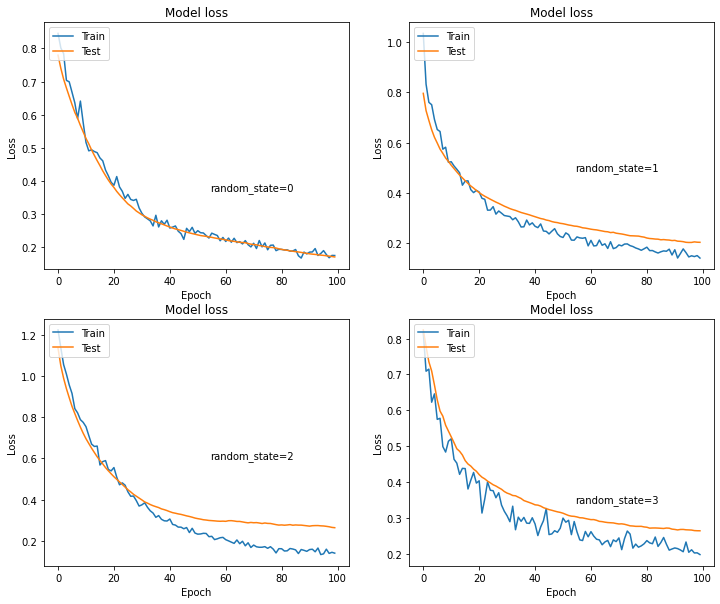

In [60]:
%%time
plt.figure(figsize=(12, 10))

for r_state in range(4):
    plt.subplot(2,2,(r_state+1))
    random_state = 0
    X_train_transform = None
    rp = random_projection.GaussianRandomProjection(n_components = n_features, random_state=r_state)
    X_train_transform = rp.fit_transform(X_train)

    X_train_trans_cross, X_test_trans_cross, y_train_cross, y_test_cross = \
                    train_test_split(X_train_transform, y_train, random_state=0)
    
    history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                             (X_test_trans_cross, y_test_cross), epochs=100, batch_size=100, shuffle=False, verbose=0)

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss']) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left')
    axes = plt.gca()
    y_bot, y_top = axes.get_ylim()
    x_bot, x_top = axes.get_xlim()
    plt.text((x_top - x_bot)/2.0, (y_top - y_bot)/2.0, "random_state="+str(r_state))


In [61]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=300, callbacks=[callback], shuffle=False, verbose=0)
scores = classifier.evaluate(X_train_trans_cross, y_train_cross, verbose=0)
print("Train %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

scores = classifier.evaluate(X_test_trans_cross, y_test_cross, verbose=0)
print("Validation %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

X_test_transform = None
X_test_transform = rp.fit_transform(X_test)

scores = classifier.evaluate(X_test_transform, y_test, verbose=0)
print("Test %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Train accuracy: 93.42%
Validation accuracy: 88.79%
Test accuracy: 90.91%


<p style="font-family: Arial; font-size:1em;color:blue;"> 
Apply ICA reduced dimension for NN
</p>

In [62]:
X_train_transform =  None
ica = FastICA(n_components=n_features, random_state=0)
X_train_transform = ica.fit_transform(X_train)

CPU times: user 3.86 s, sys: 313 ms, total: 4.17 s
Wall time: 3.32 s


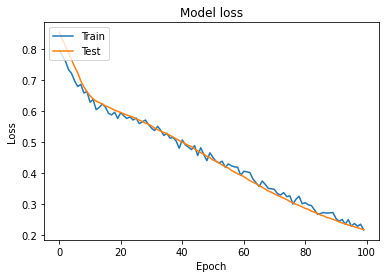

In [63]:
%%time
X_train_trans_cross = None
X_test_trans_cross = None
X_train_trans_cross, X_test_trans_cross, y_train_cross, y_test_cross = \
                train_test_split(X_train_transform, y_train, random_state=0)

history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=100, batch_size=100, shuffle=False, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left')

In [64]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=300, callbacks=[callback], shuffle=False, verbose=0)
scores = classifier.evaluate(X_train_trans_cross, y_train_cross, verbose=0)
print("Train %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

scores = classifier.evaluate(X_test_trans_cross, y_test_cross, verbose=0)
print("Validation %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

X_test_transform = None
X_test_transform = ica.fit_transform(X_test)

scores = classifier.evaluate(X_test_transform, y_test, verbose=0)
print("Test %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Train accuracy: 97.81%
Validation accuracy: 98.13%
Test accuracy: 37.76%


/Users/Rudrajit/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


<p style="font-family: Arial; font-size:1em;color:blue;"> 
Apply Factor Analysis dimentionality reduction output for NN training.
</p>

In [65]:
fa = FactorAnalysis(n_components=n_features, random_state=0)
X_transform = fa.fit_transform(X_train)
print(X_train.shape)
print(X_transform.shape)

(426, 30)
(426, 6)


CPU times: user 4.18 s, sys: 407 ms, total: 4.59 s
Wall time: 3.95 s


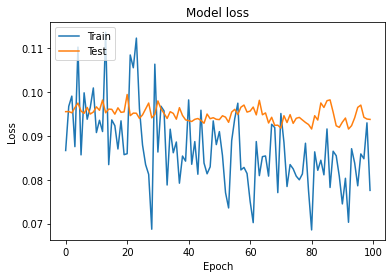

In [66]:
%%time
X_train_trans_cross = None
X_test_trans_cross = None
X_train_trans_cross, X_test_trans_cross, y_train_cross, y_test_cross = \
                train_test_split(X_train_transform, y_train, random_state=0)

history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=100, batch_size=100, shuffle=False, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left')

In [67]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=300, callbacks=[callback], shuffle=False, verbose=0)
scores = classifier.evaluate(X_train_trans_cross, y_train_cross, verbose=0)
print("Train %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

scores = classifier.evaluate(X_test_trans_cross, y_test_cross, verbose=0)
print("Validation %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

X_test_transform = None
X_test_transform = fa.fit_transform(X_test)

scores = classifier.evaluate(X_test_transform, y_test, verbose=0)
print("Test %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Train accuracy: 97.18%
Validation accuracy: 98.13%
Test accuracy: 24.48%


<p style="font-family: Arial; font-size:1.8em;color:green;">
-------------- End of Q4. ---------------------
</p>

<p style="font-family: Arial; font-size:1.8em;color:green;">
Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms (you've probably already done this), treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. Again, rerun your neural network learner on the newly projected data.
</p>

<p style="font-family: Arial; font-size:1em;color:blue;"> 
Apply KMeans clustering as dimentionality reduction for NN training.
</p>

In [68]:
X_train_transform = None
kmeans = KMeans(n_clusters=n_features, random_state=0, n_init=5)
X_train_transform = kmeans.fit_transform(X_train)

CPU times: user 4.12 s, sys: 364 ms, total: 4.49 s
Wall time: 3.37 s


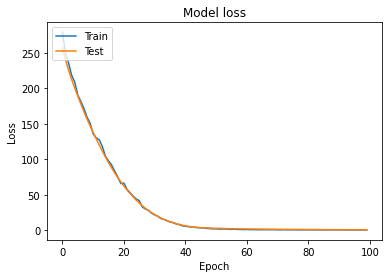

In [69]:
%%time
X_train_trans_cross = None
X_test_trans_cross = None

X_train_trans_cross, X_test_trans_cross, y_train_cross, y_test_cross = \
                            train_test_split(X_train_transform, y_train, random_state=0)

history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=100, batch_size=100, shuffle=False, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left')

In [70]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=300, callbacks=[callback], shuffle=False, verbose=0)
scores = classifier.evaluate(X_train_trans_cross, y_train_cross, verbose=0)
print("Train %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

scores = classifier.evaluate(X_test_trans_cross, y_test_cross, verbose=0)
print("Validation %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

X_test_transform = None
X_test_transform = kmeans.fit_transform(X_test)

scores = classifier.evaluate(X_test_transform, y_test, verbose=0)
print("Test %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Train accuracy: 63.64%
Validation accuracy: 59.81%
Test accuracy: 62.94%


<p style="font-family: Arial; font-size:1em;color:blue;"> 
Apply EM clustering as dimentionality reduction for NN training.
</p>

In [71]:
X_train_transform = None
gmm = GaussianMixture(n_components=n_features, random_state=0)
gmm.fit(X_train)
X_train_transform = gmm.predict_proba(X_train)
print(X_train_transform.shape)
print(X_train.shape)

(426, 6)
(426, 30)


CPU times: user 3.83 s, sys: 414 ms, total: 4.25 s
Wall time: 3.23 s


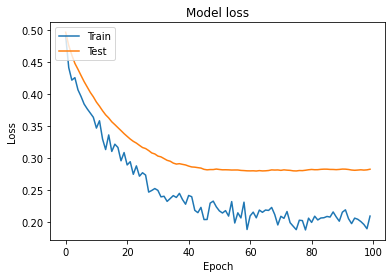

In [72]:
%%time
X_train_trans_cross = None
X_test_trans_cross = None

X_train_trans_cross, X_test_trans_cross, y_train_cross, y_test_cross = \
                            train_test_split(X_train_transform, y_train, random_state=0)

history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=100, batch_size=100, shuffle=False, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left')

In [73]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = classifier.fit(X_train_trans_cross, y_train_cross, validation_data = 
                         (X_test_trans_cross, y_test_cross), epochs=300, callbacks=[callback], shuffle=False, verbose=0)
scores = classifier.evaluate(X_train_trans_cross, y_train_cross, verbose=0)
print("Train %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

scores = classifier.evaluate(X_test_trans_cross, y_test_cross, verbose=0)
print("Validation %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

X_test_transform = None
X_test_transform = gmm.predict_proba(X_test)

scores = classifier.evaluate(X_test_transform, y_test, verbose=0)
print("Test %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Train accuracy: 95.61%
Validation accuracy: 97.20%
Test accuracy: 88.11%


<p style="font-family: Arial; font-size:1.8em;color:green;">
-------------- End of Q5. ----------------
</p>